# Glumpy (480Hz, nicht-fullscreen, pixel [5,5], 50 iterations)
Frameworks
- qt
- pyglet
- glfw
- sdl/pygame

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
PATH = "../../data/glumpy/glumpy_301123_55_480hz"

In [19]:
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
files

['glumpy_glfw_default_False_bitblt_701418ac-49fe-4137-a6b0-041750c54e26.csv',
 'glumpy_glfw_default_False_getdbits_72e2fed3-76d7-4332-b199-8d718fc4434b.csv',
 'glumpy_glfw_default_False_getpixel_640fab74-ab3e-4c9f-932f-39c1048db4f7.csv',
 'glumpy_glfw_default_False_windup_python_80f01740-9343-4756-96f3-76d453c5df5d.csv',
 'glumpy_glfw_default_True_bitblt_99d3c043-aa8b-4284-a7ae-66a2824dd6ba.csv',
 'glumpy_glfw_default_True_getdbits_50bd0e2c-5b18-4de8-b2f3-29e4d2280ec4.csv',
 'glumpy_glfw_default_True_getpixel_ac849e7e-4ff8-4c44-9fc7-f21a88992d48.csv',
 'glumpy_glfw_default_True_windup_python_056655f8-d871-447d-8f10-8c19d7a0f5d9.csv',
 'glumpy_glfw_rects_False_bitblt_41f353c5-7cd5-41de-9aa4-913cfdf9dbc6.csv',
 'glumpy_glfw_rects_False_getdbits_83527afb-174f-4ec7-94fe-7fc412f0dd4e.csv',
 'glumpy_glfw_rects_False_getpixel_7a51c160-219c-4a50-9115-3d043b3c16d4.csv',
 'glumpy_glfw_rects_False_windup_python_cdd75835-2920-4b59-8a6e-dfe2dd8aa4eb.csv',
 'glumpy_glfw_rects_True_bitblt_f22ad0e4-64

In [20]:
dataframes = []
for file in files:
    dataframes.append(pd.read_csv(f"{PATH}/{file}"))
data_raw = pd.concat(dataframes)

In [21]:
# clean because windup not working with opengl based
# df.loc[~((df['col1'] == 'A') & (df['col2'] > 6))] 
data_clean = data_raw.loc[~((data_raw['fw_running'] == True) & (data_raw['fw'] == -1) & (data_raw['diff'] < 0))]
data = data_clean

## End-to-end latencies with and without running framework tester
### Complexity: Default

Almost the same -> no additional latency with framework tester

C:\Users\tina\AppData\Local\Temp\ipykernel_13252\3893092759.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


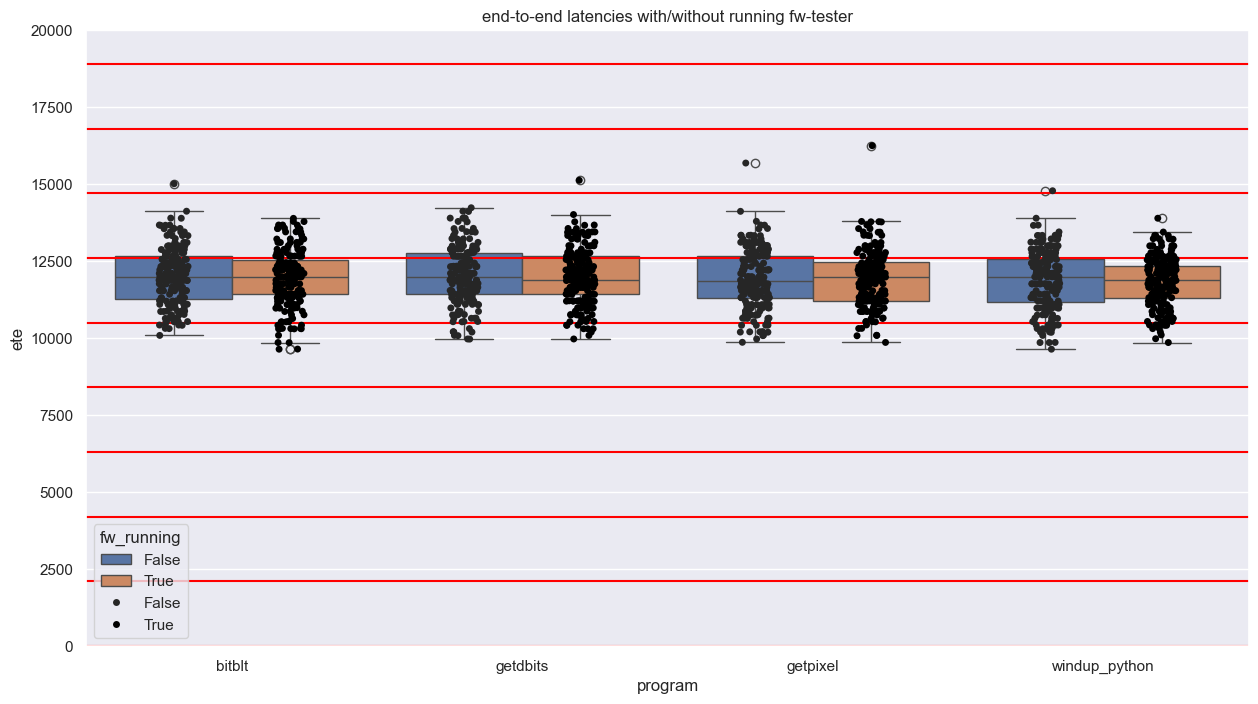

In [33]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 20000)
for i in range(0, 20):
    plt.axhline(i*2.1*1000, color='red')

### Complexity: Rects

Also, no additional latency (even faster with running framework tester)

C:\Users\tina\AppData\Local\Temp\ipykernel_13252\964307136.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


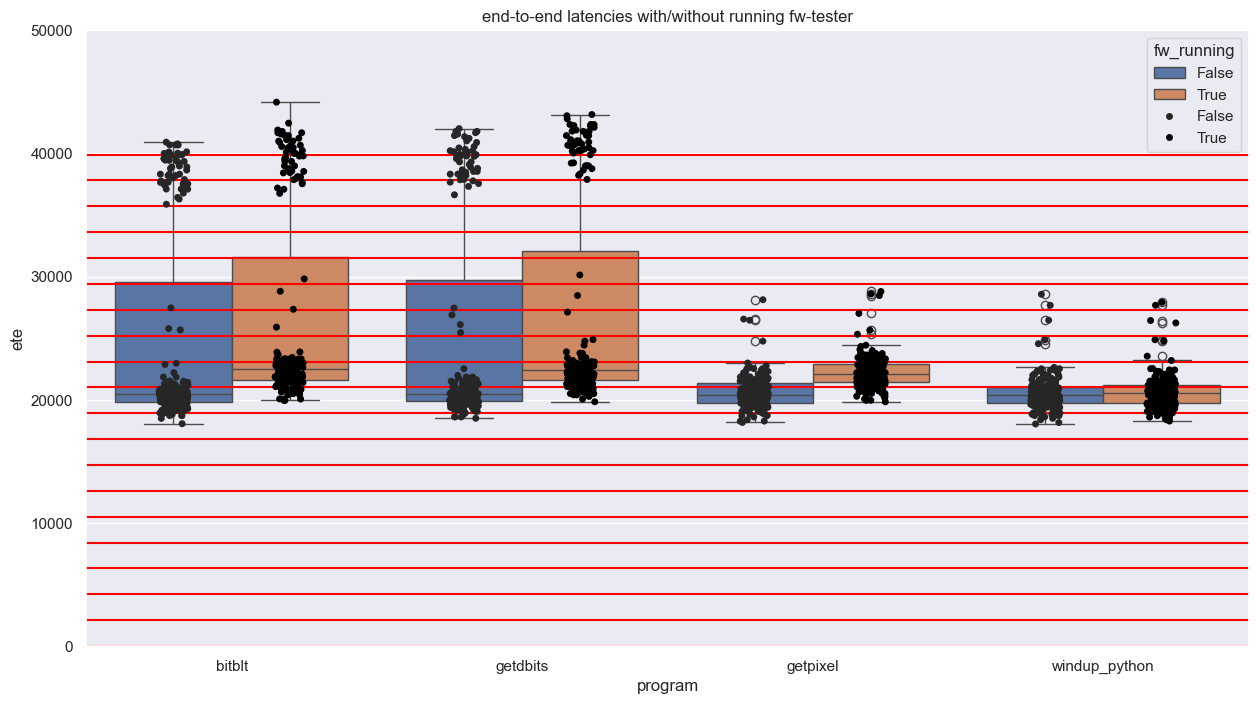

In [34]:
sns.boxplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 50000)
for i in range(0, 20):
    plt.axhline(i*2.1*1000, color='red')

## Framework latency by framework
### Complexity: Default

no results for pyqt5 and wxpython because of border

C:\Users\tina\AppData\Local\Temp\ipykernel_13252\1753498729.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 25000.0)

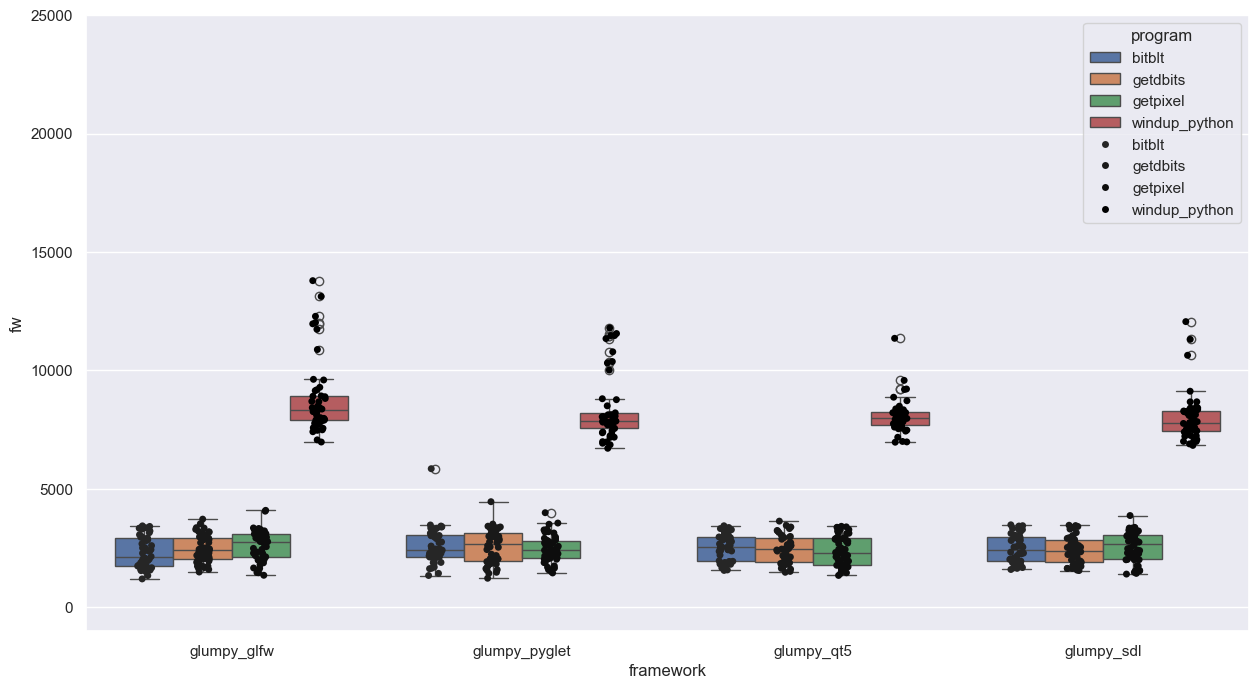

In [24]:
sns.boxplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 25000)

### Complexity: Rects

C:\Users\tina\AppData\Local\Temp\ipykernel_13252\1174379519.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 40000.0)

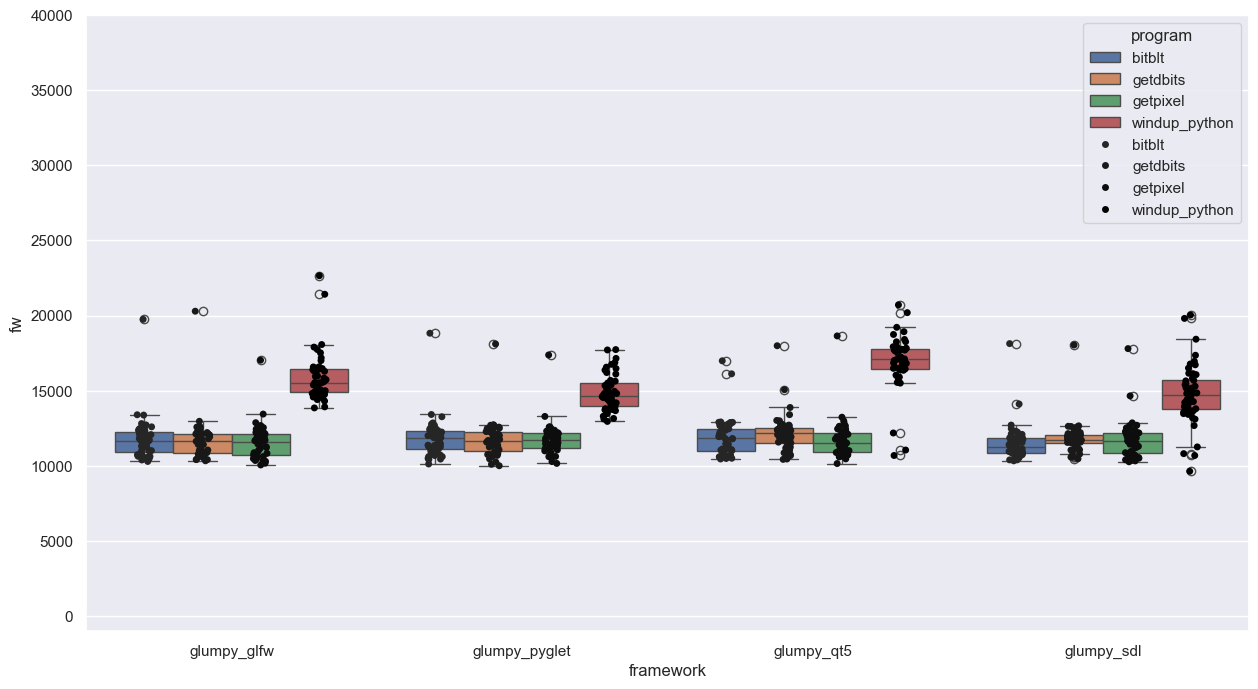

In [25]:
sns.boxplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 40000)

### Framework latency by complexity

C:\Users\tina\AppData\Local\Temp\ipykernel_13252\252265620.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')


<Axes: xlabel='complexity', ylabel='fw'>

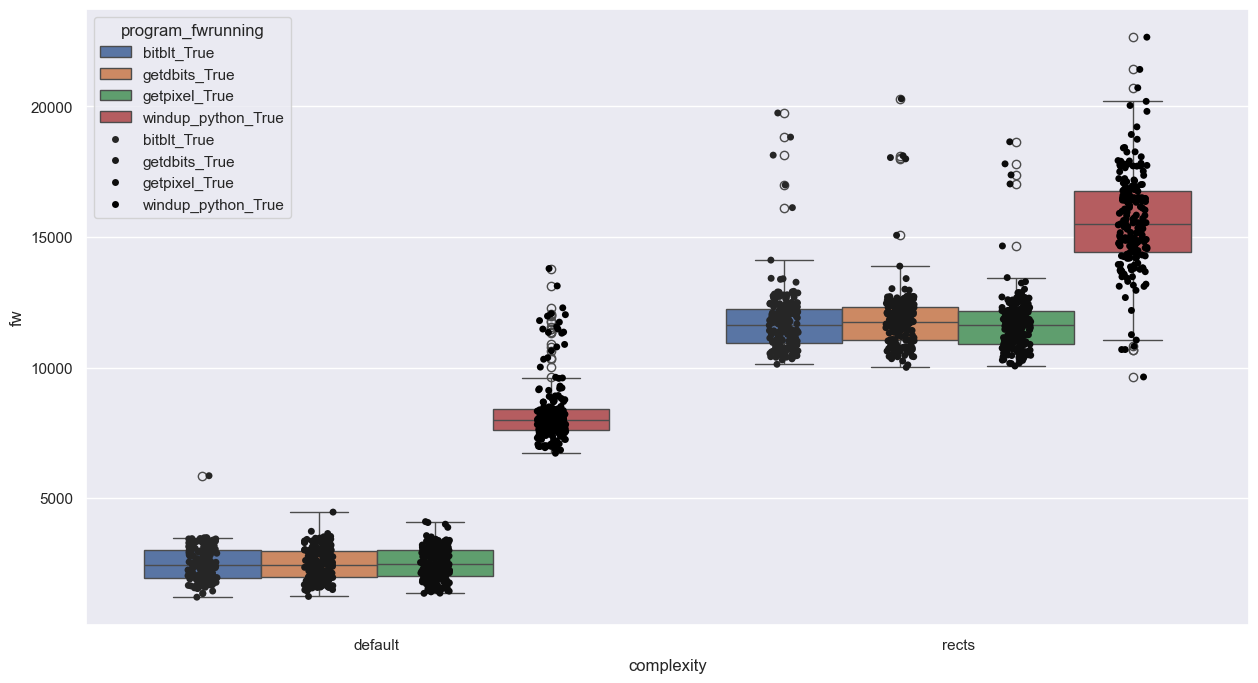

In [26]:
sns.boxplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')

### Framework latency by framework

C:\Users\tina\AppData\Local\Temp\ipykernel_13252\2248004208.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#000000'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))


<Axes: xlabel='framework', ylabel='fw'>

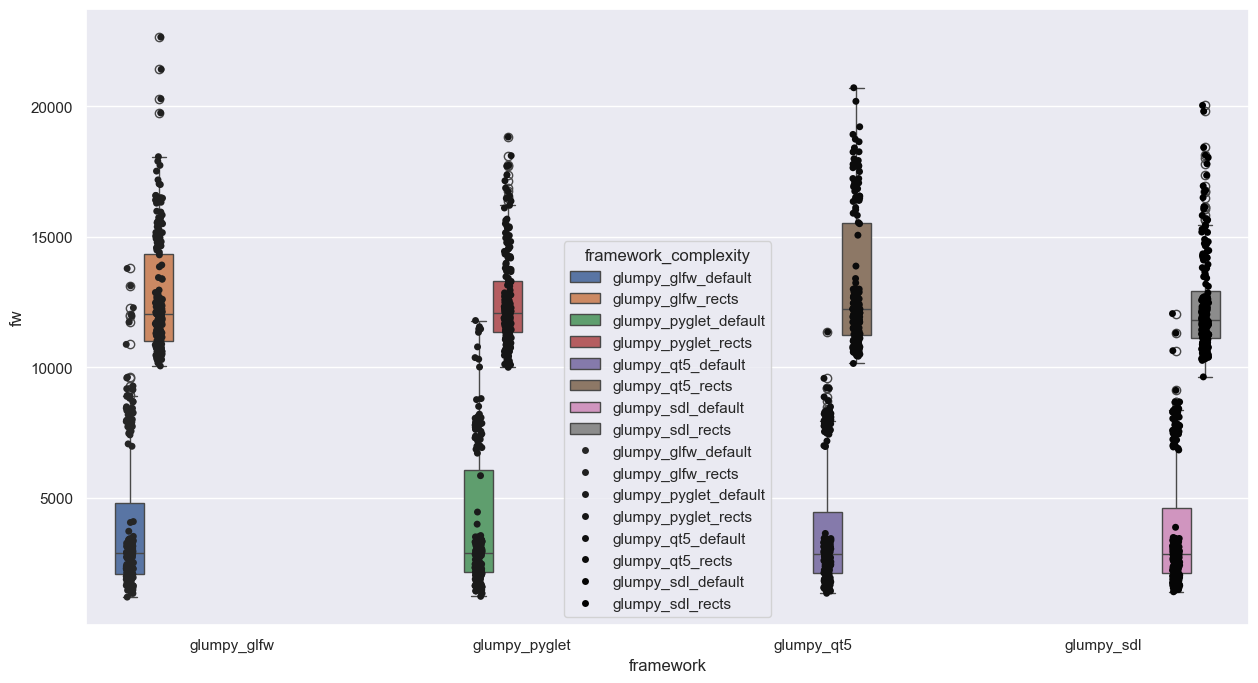

In [27]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))

C:\Users\tina\AppData\Local\Temp\ipykernel_13252\3460521000.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework_complexity', y='fw', hue='program', dodge=True, color='black')


<Axes: xlabel='framework_complexity', ylabel='fw'>

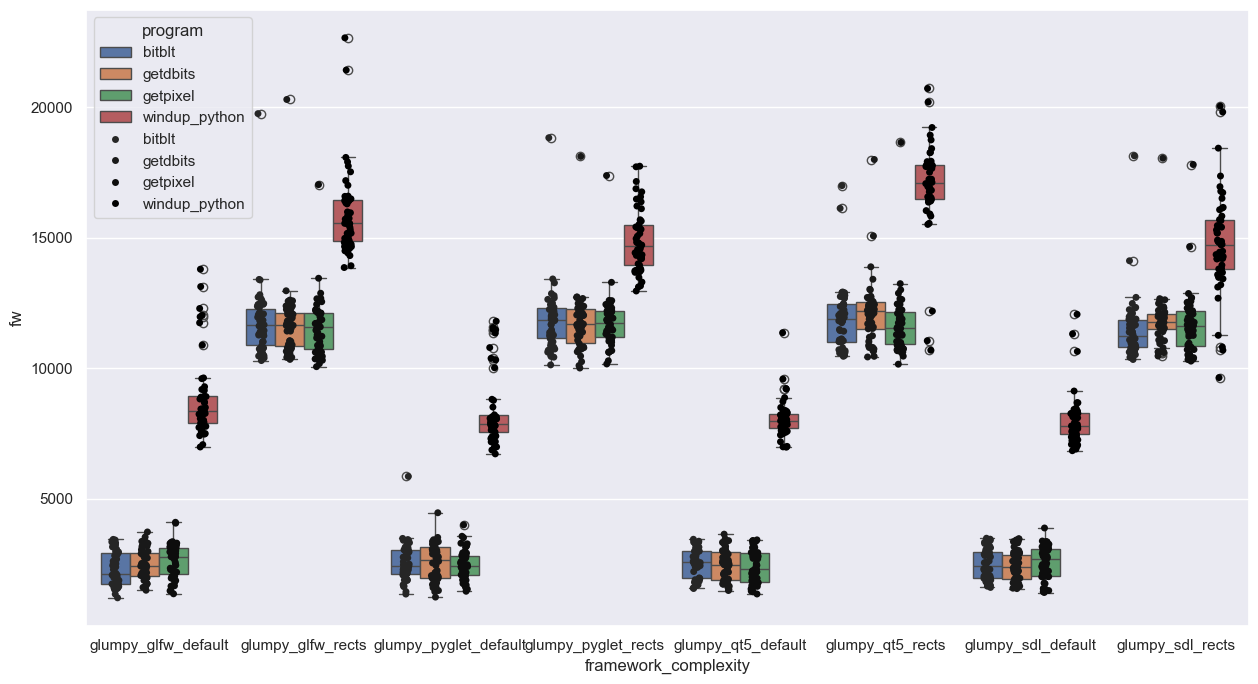

In [35]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework_complexity', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework_complexity', y='fw', hue='program', dodge=True, color='black')

## Difference (ete and fw) by program
### Complexity: Rects

C:\Users\tina\AppData\Local\Temp\ipykernel_13252\902970262.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='diff'>

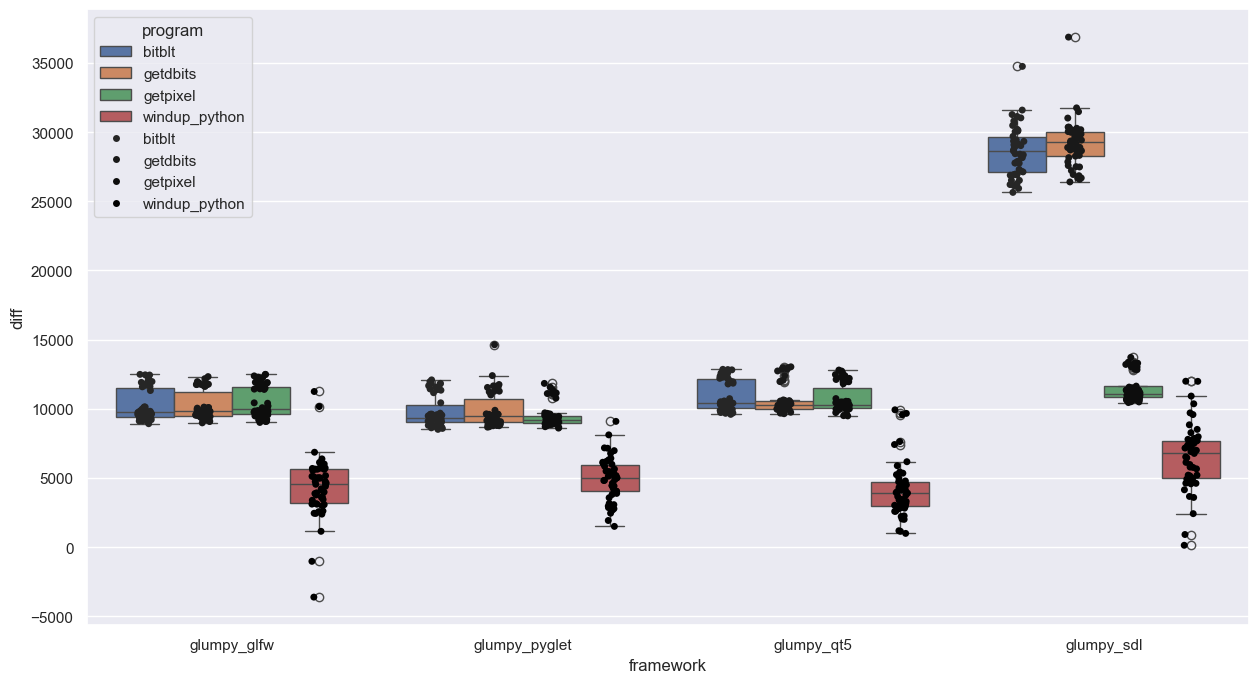

In [29]:
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')


### Complexity: Default

C:\Users\tina\AppData\Local\Temp\ipykernel_13252\4192689939.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')


(-20000.0, 30000.0)

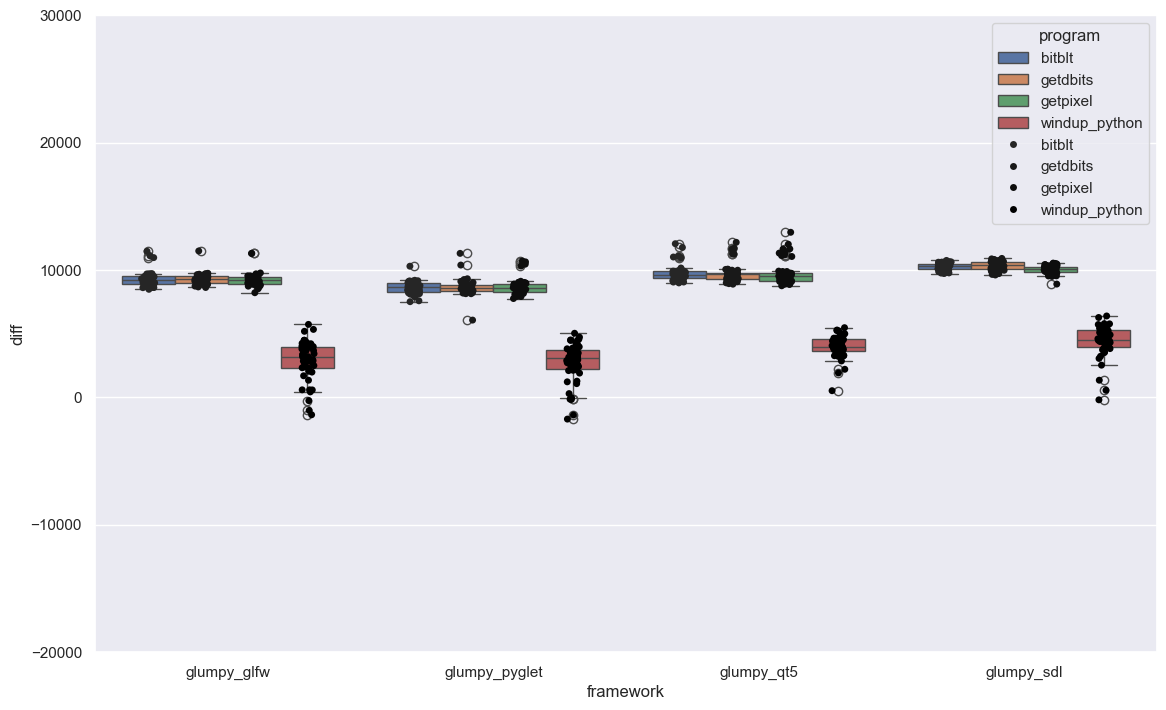

In [30]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-20000, 30000)

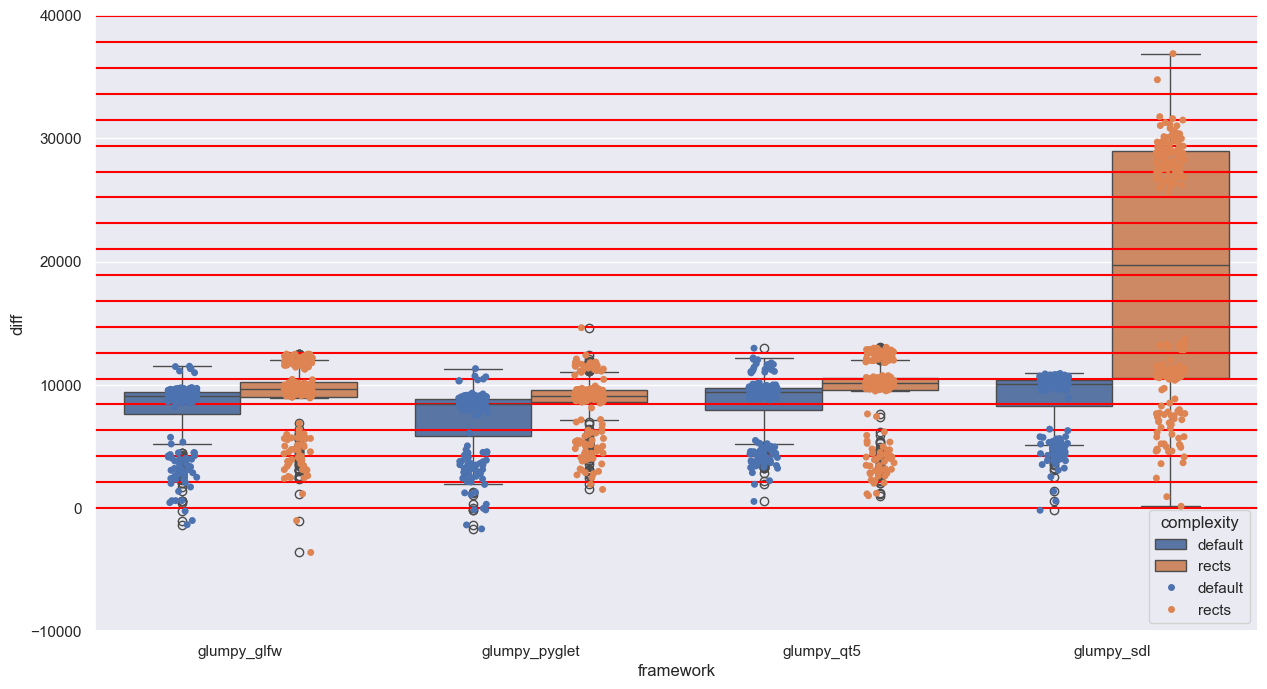

In [36]:
sns.boxplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True).set_title('')
sns.stripplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True)
ax = plt.gca()
ax.set_ylim(-10000, 40000)
for i in range(0, 20):
    plt.axhline(i*2.1*1000, color='red')